# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 90}

plt.rc('font', **font)
import seaborn as sns
# fig = plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=5, figsize = (300,50))
plt.tight_layout()
i =0;
for ax in axes:
  ax.plot(X_train[:,i],y_train,'g',lw=10)
  ax.set_xlabel('X')
  ax.set_ylabel('y')
  ax.set_title('feature-'+ str(i))
  i=i+1


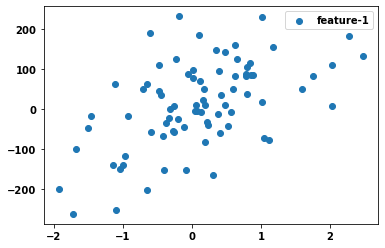

In [3]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.scatter(X_train[:,0],y_train, label = 'feature-1')
plt.legend(loc='best')

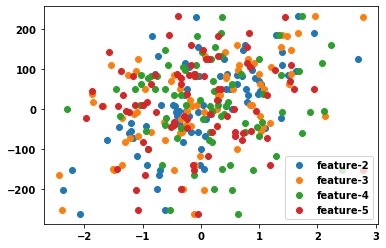

In [4]:
plt.scatter(X_train[:,1],y_train, label = "feature-2")
plt.scatter(X_train[:,2],y_train, label = "feature-3")
plt.scatter(X_train[:,3],y_train, label = "feature-4")
plt.scatter(X_train[:,4],y_train, label = "feature-5")
plt.legend(loc='best')

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Normalization
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [7]:
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [8]:
X_train.shape

(80, 5)

In [9]:
import numpy as np
y_train = np.array(y_train) 

In [10]:
y_train = y_train.reshape(80,1)
y_train.shape

(80, 1)

In [11]:
y_test = y_test.reshape(20,1)
y_test.shape

(20, 1)

In [12]:
model = Sequential()

model.add(Dense(5,activation='relu'))

model.add(Dense(5,activation='relu'))

model.add(Dense(5,activation='relu'))

model.add(Dense(1))
model.compile(optimizer= SGD(learning_rate=0.002, clipnorm= 5),loss = 'mse')

In [13]:
model.fit(x=X_train,y= y_train, validation_data=(X_test,y_test),batch_size = 128, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 1s 974ms/step - loss: 11512.6826 - val_loss: 11592.3799
Epoch 2/1000
1/1 [==============================] - 0s 48ms/step - loss: 11511.9590 - val_loss: 11590.7881
Epoch 3/1000
1/1 [==============================] - 0s 51ms/step - loss: 11511.2354 - val_loss: 11589.1523
Epoch 4/1000
1/1 [==============================] - 0s 44ms/step - loss: 11510.5205 - val_loss: 11587.4395
Epoch 5/1000
1/1 [==============================] - 0s 43ms/step - loss: 11509.7705 - val_loss: 11585.6826
Epoch 6/1000
1/1 [==============================] - 0s 56ms/step - loss: 11508.9941 - val_loss: 11583.8027
Epoch 7/1000
1/1 [==============================] - 0s 61ms/step - loss: 11508.2168 - val_loss: 11581.8574
Epoch 8/1000
1/1 [==============================] - 0s 55ms/step - loss: 11507.4375 - val_loss: 11579.8467
Epoch 9/1000
1/1 [==============================] - 0s 48ms/step - loss: 11506.6592 - val_loss: 11577.7920
Epoch 10/1000
1/1 [=================

Epoch 77/1000
1/1 [==============================] - 0s 41ms/step - loss: 11337.1816 - val_loss: 11120.7363
Epoch 78/1000
1/1 [==============================] - 0s 37ms/step - loss: 11332.5059 - val_loss: 11107.3916
Epoch 79/1000
1/1 [==============================] - 0s 36ms/step - loss: 11327.7871 - val_loss: 11093.8066
Epoch 80/1000
1/1 [==============================] - 0s 41ms/step - loss: 11323.0146 - val_loss: 11079.9951
Epoch 81/1000
1/1 [==============================] - 0s 41ms/step - loss: 11318.1934 - val_loss: 11065.9375
Epoch 82/1000
1/1 [==============================] - 0s 36ms/step - loss: 11313.3262 - val_loss: 11051.6504
Epoch 83/1000
1/1 [==============================] - 0s 38ms/step - loss: 11308.4141 - val_loss: 11037.1143
Epoch 84/1000
1/1 [==============================] - 0s 42ms/step - loss: 11303.4473 - val_loss: 11022.3516
Epoch 85/1000
1/1 [==============================] - 0s 37ms/step - loss: 11298.4424 - val_loss: 11007.3652
Epoch 86/1000
1/1 [=========

1/1 [==============================] - 0s 42ms/step - loss: 10918.5566 - val_loss: 10032.4512
Epoch 153/1000
1/1 [==============================] - 0s 45ms/step - loss: 10910.8730 - val_loss: 10017.6602
Epoch 154/1000
1/1 [==============================] - 0s 41ms/step - loss: 10903.1035 - val_loss: 10002.8184
Epoch 155/1000
1/1 [==============================] - 0s 43ms/step - loss: 10895.2549 - val_loss: 9987.9082
Epoch 156/1000
1/1 [==============================] - 0s 42ms/step - loss: 10887.3164 - val_loss: 9972.9473
Epoch 157/1000
1/1 [==============================] - 0s 36ms/step - loss: 10879.2852 - val_loss: 9957.9414
Epoch 158/1000
1/1 [==============================] - 0s 42ms/step - loss: 10871.1592 - val_loss: 9942.8906
Epoch 159/1000
1/1 [==============================] - 0s 32ms/step - loss: 10862.9395 - val_loss: 9927.7959
Epoch 160/1000
1/1 [==============================] - 0s 36ms/step - loss: 10854.6230 - val_loss: 9912.6592
Epoch 161/1000
1/1 [====================

Epoch 228/1000
1/1 [==============================] - 0s 47ms/step - loss: 9951.3047 - val_loss: 8762.0645
Epoch 229/1000
1/1 [==============================] - 0s 54ms/step - loss: 9931.0215 - val_loss: 8742.4150
Epoch 230/1000
1/1 [==============================] - 0s 41ms/step - loss: 9910.4678 - val_loss: 8722.6484
Epoch 231/1000
1/1 [==============================] - 0s 44ms/step - loss: 9889.6426 - val_loss: 8702.7598
Epoch 232/1000
1/1 [==============================] - 0s 46ms/step - loss: 9868.5430 - val_loss: 8682.7451
Epoch 233/1000
1/1 [==============================] - 0s 42ms/step - loss: 9847.1641 - val_loss: 8662.6035
Epoch 234/1000
1/1 [==============================] - 0s 42ms/step - loss: 9825.5049 - val_loss: 8642.3311
Epoch 235/1000
1/1 [==============================] - 0s 47ms/step - loss: 9803.5625 - val_loss: 8621.9268
Epoch 236/1000
1/1 [==============================] - 0s 44ms/step - loss: 9781.3350 - val_loss: 8601.3877
Epoch 237/1000
1/1 [=================

1/1 [==============================] - 0s 46ms/step - loss: 8073.2593 - val_loss: 6627.6187
Epoch 305/1000
1/1 [==============================] - 0s 41ms/step - loss: 8048.6357 - val_loss: 6593.7827
Epoch 306/1000
1/1 [==============================] - 0s 45ms/step - loss: 8023.9053 - val_loss: 6559.8975
Epoch 307/1000
1/1 [==============================] - 0s 40ms/step - loss: 7999.1079 - val_loss: 6525.7539
Epoch 308/1000
1/1 [==============================] - 0s 38ms/step - loss: 7974.7803 - val_loss: 6490.9043
Epoch 309/1000
1/1 [==============================] - 0s 40ms/step - loss: 7951.0166 - val_loss: 6455.9658
Epoch 310/1000
1/1 [==============================] - 0s 38ms/step - loss: 7927.1885 - val_loss: 6420.9390
Epoch 311/1000
1/1 [==============================] - 0s 41ms/step - loss: 7903.3076 - val_loss: 6385.8076
Epoch 312/1000
1/1 [==============================] - 0s 45ms/step - loss: 7879.4424 - val_loss: 6350.5918
Epoch 313/1000
1/1 [==============================] 

1/1 [==============================] - 0s 47ms/step - loss: 6229.7319 - val_loss: 4211.4863
Epoch 381/1000
1/1 [==============================] - 0s 41ms/step - loss: 6206.6123 - val_loss: 4189.1104
Epoch 382/1000
1/1 [==============================] - 0s 41ms/step - loss: 6183.7710 - val_loss: 4164.4717
Epoch 383/1000
1/1 [==============================] - 0s 40ms/step - loss: 6161.6108 - val_loss: 4139.4688
Epoch 384/1000
1/1 [==============================] - 0s 36ms/step - loss: 6139.5420 - val_loss: 4114.8262
Epoch 385/1000
1/1 [==============================] - 0s 39ms/step - loss: 6118.5269 - val_loss: 4089.4067
Epoch 386/1000
1/1 [==============================] - 0s 40ms/step - loss: 6097.7070 - val_loss: 4064.6157
Epoch 387/1000
1/1 [==============================] - 0s 39ms/step - loss: 6077.0439 - val_loss: 4040.4871
Epoch 388/1000
1/1 [==============================] - 0s 37ms/step - loss: 6056.5322 - val_loss: 4017.0593
Epoch 389/1000
1/1 [==============================] 

1/1 [==============================] - 0s 43ms/step - loss: 5020.1650 - val_loss: 3129.1204
Epoch 457/1000
1/1 [==============================] - 0s 41ms/step - loss: 5012.7412 - val_loss: 3122.5991
Epoch 458/1000
1/1 [==============================] - 0s 39ms/step - loss: 5005.5381 - val_loss: 3116.2129
Epoch 459/1000
1/1 [==============================] - 0s 34ms/step - loss: 4998.7236 - val_loss: 3109.8755
Epoch 460/1000
1/1 [==============================] - 0s 40ms/step - loss: 4992.3276 - val_loss: 3103.2466
Epoch 461/1000
1/1 [==============================] - 0s 52ms/step - loss: 4986.3877 - val_loss: 3097.4119
Epoch 462/1000
1/1 [==============================] - 0s 37ms/step - loss: 4980.5244 - val_loss: 3091.0742
Epoch 463/1000
1/1 [==============================] - 0s 41ms/step - loss: 4974.9014 - val_loss: 3085.4761
Epoch 464/1000
1/1 [==============================] - 0s 40ms/step - loss: 4969.4932 - val_loss: 3078.4397
Epoch 465/1000
1/1 [==============================] 

1/1 [==============================] - 0s 56ms/step - loss: 4769.0181 - val_loss: 2909.5171
Epoch 533/1000
1/1 [==============================] - 0s 40ms/step - loss: 4761.8936 - val_loss: 2917.3511
Epoch 534/1000
1/1 [==============================] - 0s 43ms/step - loss: 4762.3237 - val_loss: 2904.2024
Epoch 535/1000
1/1 [==============================] - 0s 40ms/step - loss: 4755.3330 - val_loss: 2911.8499
Epoch 536/1000
1/1 [==============================] - 0s 43ms/step - loss: 4755.5879 - val_loss: 2898.8660
Epoch 537/1000
1/1 [==============================] - 0s 35ms/step - loss: 4748.7368 - val_loss: 2906.3188
Epoch 538/1000
1/1 [==============================] - 0s 45ms/step - loss: 4748.8076 - val_loss: 2893.4866
Epoch 539/1000
1/1 [==============================] - 0s 35ms/step - loss: 4742.0933 - val_loss: 2900.7566
Epoch 540/1000
1/1 [==============================] - 0s 44ms/step - loss: 4741.9834 - val_loss: 2888.0801
Epoch 541/1000
1/1 [==============================] 

1/1 [==============================] - 0s 41ms/step - loss: 4485.8369 - val_loss: 2688.7500
Epoch 609/1000
1/1 [==============================] - 0s 47ms/step - loss: 4484.1978 - val_loss: 2689.0205
Epoch 610/1000
1/1 [==============================] - 0s 53ms/step - loss: 4477.5088 - val_loss: 2682.1831
Epoch 611/1000
1/1 [==============================] - 0s 54ms/step - loss: 4475.8809 - val_loss: 2682.4070
Epoch 612/1000
1/1 [==============================] - 0s 58ms/step - loss: 4469.1118 - val_loss: 2675.5696
Epoch 613/1000
1/1 [==============================] - 0s 66ms/step - loss: 4467.4854 - val_loss: 2675.7520
Epoch 614/1000
1/1 [==============================] - 0s 56ms/step - loss: 4460.6445 - val_loss: 2668.8960
Epoch 615/1000
1/1 [==============================] - 0s 71ms/step - loss: 4459.0278 - val_loss: 2669.0820
Epoch 616/1000
1/1 [==============================] - 0s 48ms/step - loss: 4452.1714 - val_loss: 2662.1587
Epoch 617/1000
1/1 [==============================] 

1/1 [==============================] - 0s 49ms/step - loss: 4087.3828 - val_loss: 2374.3325
Epoch 685/1000
1/1 [==============================] - 0s 60ms/step - loss: 4083.4243 - val_loss: 2372.3767
Epoch 686/1000
1/1 [==============================] - 0s 49ms/step - loss: 4073.4272 - val_loss: 2363.4067
Epoch 687/1000
1/1 [==============================] - 0s 50ms/step - loss: 4069.4734 - val_loss: 2361.2749
Epoch 688/1000
1/1 [==============================] - 0s 55ms/step - loss: 4059.2656 - val_loss: 2352.3152
Epoch 689/1000
1/1 [==============================] - 0s 64ms/step - loss: 4055.2949 - val_loss: 2350.0278
Epoch 690/1000
1/1 [==============================] - 0s 66ms/step - loss: 4044.9126 - val_loss: 2341.0325
Epoch 691/1000
1/1 [==============================] - 0s 43ms/step - loss: 4040.8914 - val_loss: 2338.5930
Epoch 692/1000
1/1 [==============================] - 0s 62ms/step - loss: 4030.3406 - val_loss: 2329.5735
Epoch 693/1000
1/1 [==============================] 

1/1 [==============================] - 0s 46ms/step - loss: 3381.9558 - val_loss: 1803.8646
Epoch 761/1000
1/1 [==============================] - 0s 68ms/step - loss: 3370.6978 - val_loss: 1800.3191
Epoch 762/1000
1/1 [==============================] - 0s 51ms/step - loss: 3356.2554 - val_loss: 1782.9821
Epoch 763/1000
1/1 [==============================] - 0s 46ms/step - loss: 3344.9546 - val_loss: 1779.1696
Epoch 764/1000
1/1 [==============================] - 0s 55ms/step - loss: 3330.0500 - val_loss: 1761.5013
Epoch 765/1000
1/1 [==============================] - 0s 51ms/step - loss: 3317.8423 - val_loss: 1757.7828
Epoch 766/1000
1/1 [==============================] - 0s 56ms/step - loss: 3302.8503 - val_loss: 1739.6328
Epoch 767/1000
1/1 [==============================] - 0s 53ms/step - loss: 3290.3608 - val_loss: 1735.6091
Epoch 768/1000
1/1 [==============================] - 0s 54ms/step - loss: 3275.1265 - val_loss: 1717.2963
Epoch 769/1000
1/1 [==============================] 

Epoch 837/1000
1/1 [==============================] - 0s 56ms/step - loss: 1949.4656 - val_loss: 687.8671
Epoch 838/1000
1/1 [==============================] - 0s 50ms/step - loss: 1925.2363 - val_loss: 667.9547
Epoch 839/1000
1/1 [==============================] - 0s 45ms/step - loss: 1901.2584 - val_loss: 654.1270
Epoch 840/1000
1/1 [==============================] - 0s 50ms/step - loss: 1876.8115 - val_loss: 634.3314
Epoch 841/1000
1/1 [==============================] - 0s 52ms/step - loss: 1853.7054 - val_loss: 620.5615
Epoch 842/1000
1/1 [==============================] - 0s 52ms/step - loss: 1830.3997 - val_loss: 601.1432
Epoch 843/1000
1/1 [==============================] - 0s 58ms/step - loss: 1807.9847 - val_loss: 588.0056
Epoch 844/1000
1/1 [==============================] - 0s 57ms/step - loss: 1784.5540 - val_loss: 568.6564
Epoch 845/1000
1/1 [==============================] - 0s 50ms/step - loss: 1761.9968 - val_loss: 555.5941
Epoch 846/1000
1/1 [==========================

Epoch 915/1000
1/1 [==============================] - 0s 46ms/step - loss: 544.2374 - val_loss: 38.1127
Epoch 916/1000
1/1 [==============================] - 0s 50ms/step - loss: 533.4884 - val_loss: 35.4677
Epoch 917/1000
1/1 [==============================] - 0s 50ms/step - loss: 537.1647 - val_loss: 38.6938
Epoch 918/1000
1/1 [==============================] - 0s 51ms/step - loss: 525.6494 - val_loss: 35.5068
Epoch 919/1000
1/1 [==============================] - 0s 48ms/step - loss: 528.4955 - val_loss: 40.4484
Epoch 920/1000
1/1 [==============================] - 0s 51ms/step - loss: 518.0482 - val_loss: 36.8465
Epoch 921/1000
1/1 [==============================] - 0s 44ms/step - loss: 522.1934 - val_loss: 41.6470
Epoch 922/1000
1/1 [==============================] - 0s 48ms/step - loss: 511.5049 - val_loss: 37.6846
Epoch 923/1000
1/1 [==============================] - 0s 57ms/step - loss: 515.6182 - val_loss: 43.3155
Epoch 924/1000
1/1 [==============================] - 0s 66ms/st

Epoch 994/1000
1/1 [==============================] - 0s 46ms/step - loss: 418.8546 - val_loss: 70.0915
Epoch 995/1000
1/1 [==============================] - 0s 47ms/step - loss: 425.4166 - val_loss: 81.9761
Epoch 996/1000
1/1 [==============================] - 0s 49ms/step - loss: 418.0380 - val_loss: 70.3661
Epoch 997/1000
1/1 [==============================] - 0s 49ms/step - loss: 424.3250 - val_loss: 82.1033
Epoch 998/1000
1/1 [==============================] - 0s 39ms/step - loss: 417.5558 - val_loss: 70.8117
Epoch 999/1000
1/1 [==============================] - 0s 42ms/step - loss: 423.3476 - val_loss: 82.8855
Epoch 1000/1000
1/1 [==============================] - 0s 55ms/step - loss: 416.8694 - val_loss: 71.2551


In [14]:
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses

loss      val_loss
0    11512.682617  11592.379883
1    11511.958984  11590.788086
2    11511.235352  11589.152344
3    11510.520508  11587.439453
4    11509.770508  11585.682617
..            ...           ...
995    418.038025     70.366135
996    424.324951     82.103348
997    417.555756     70.811699
998    423.347565     82.885544
999    416.869446     71.255150

[1000 rows x 2 columns]

1/1 [==============================] - 0s 141ms/step


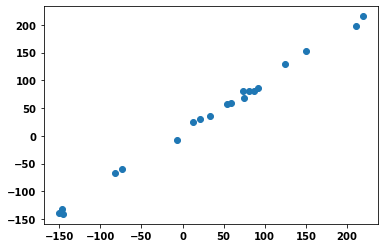

In [15]:

# X_test
pred = model.predict(X_test)
plt.scatter(pred,y_test)
# plt.legend()
# df = pd.DataFrame({"Predictions":pred , "y_test":y_test})

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

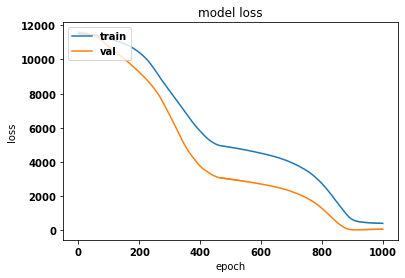

In [16]:
losses.plot()
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [17]:
def r2_score(y_true, y_pred):
    N = np.sum(np.square(y_true-y_pred))/np.sum(np.square(y_true - np.mean(y_true)))
    return 1-N
pred = model.predict(X_test)
r2_score(y_test,pred)

1/1 [==============================] - 0s 31ms/step


0.992994487562961

## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [21]:
X_train.shape

(8000, 5)

In [51]:
y_test = y_test.reshape(2000,1)
y_train = y_train.reshape(8000,1)

In [56]:
model = Sequential()

model.add(Dense(5,activation='relu'))

model.add(Dense(5,activation='relu'))

model.add(Dense(5,activation='relu'))

model.add(Dense(1))
model.compile(optimizer= Adam(learning_rate=0.005,clipnorm = 5) ,loss = 'mse')

In [57]:
model.fit(x=X_train,y= y_train, validation_data=(X_test,y_test),batch_size = 128, epochs = 400)

Epoch 1/400
63/63 [==============================] - 1s 4ms/step - loss: 13752.7393 - val_loss: 13851.0479
Epoch 2/400
63/63 [==============================] - 0s 3ms/step - loss: 13527.2803 - val_loss: 13383.8926
Epoch 3/400
63/63 [==============================] - 0s 3ms/step - loss: 12756.8477 - val_loss: 12217.2559
Epoch 4/400
63/63 [==============================] - 0s 3ms/step - loss: 11286.2520 - val_loss: 10384.8291
Epoch 5/400
63/63 [==============================] - 0s 3ms/step - loss: 9557.3037 - val_loss: 8822.7803
Epoch 6/400
63/63 [==============================] - 0s 3ms/step - loss: 8353.3125 - val_loss: 7968.1011
Epoch 7/400
63/63 [==============================] - 0s 3ms/step - loss: 7705.4365 - val_loss: 7420.9053
Epoch 8/400
63/63 [==============================] - 0s 3ms/step - loss: 7315.0176 - val_loss: 7101.5615
Epoch 9/400
63/63 [==============================] - 0s 3ms/step - loss: 6992.9888 - val_loss: 6787.9189
Epoch 10/400
63/63 [===========================

63/63 [==============================] - 0s 3ms/step - loss: 4935.4585 - val_loss: 4899.1816
Epoch 79/400
63/63 [==============================] - 0s 3ms/step - loss: 4913.7407 - val_loss: 4876.9004
Epoch 80/400
63/63 [==============================] - 0s 3ms/step - loss: 4890.6592 - val_loss: 4854.4707
Epoch 81/400
63/63 [==============================] - 0s 3ms/step - loss: 4867.4648 - val_loss: 4838.1055
Epoch 82/400
63/63 [==============================] - 0s 3ms/step - loss: 4847.1807 - val_loss: 4818.5884
Epoch 83/400
63/63 [==============================] - 0s 3ms/step - loss: 4825.8467 - val_loss: 4788.7329
Epoch 84/400
63/63 [==============================] - 0s 3ms/step - loss: 4800.4487 - val_loss: 4767.9233
Epoch 85/400
63/63 [==============================] - 0s 3ms/step - loss: 4780.3213 - val_loss: 4761.0610
Epoch 86/400
63/63 [==============================] - 0s 3ms/step - loss: 4758.7827 - val_loss: 4722.6128
Epoch 87/400
63/63 [==============================] - 0s 3m

Epoch 155/400
63/63 [==============================] - 0s 3ms/step - loss: 3417.5225 - val_loss: 3401.3311
Epoch 156/400
63/63 [==============================] - 0s 3ms/step - loss: 3399.9673 - val_loss: 3384.7793
Epoch 157/400
63/63 [==============================] - 0s 3ms/step - loss: 3388.9460 - val_loss: 3366.2048
Epoch 158/400
63/63 [==============================] - 0s 3ms/step - loss: 3369.2405 - val_loss: 3347.3691
Epoch 159/400
63/63 [==============================] - 0s 3ms/step - loss: 3349.6218 - val_loss: 3332.9705
Epoch 160/400
63/63 [==============================] - 0s 3ms/step - loss: 3331.1011 - val_loss: 3312.9050
Epoch 161/400
63/63 [==============================] - 0s 3ms/step - loss: 3317.0540 - val_loss: 3304.3584
Epoch 162/400
63/63 [==============================] - 0s 3ms/step - loss: 3303.0095 - val_loss: 3280.8086
Epoch 163/400
63/63 [==============================] - 0s 3ms/step - loss: 3283.7515 - val_loss: 3264.4333
Epoch 164/400
63/63 [================

63/63 [==============================] - 0s 3ms/step - loss: 2327.2590 - val_loss: 2312.8918
Epoch 232/400
63/63 [==============================] - 0s 3ms/step - loss: 2315.4580 - val_loss: 2306.2881
Epoch 233/400
63/63 [==============================] - 0s 3ms/step - loss: 2300.1167 - val_loss: 2282.9070
Epoch 234/400
63/63 [==============================] - 0s 3ms/step - loss: 2284.1536 - val_loss: 2287.3970
Epoch 235/400
63/63 [==============================] - 0s 3ms/step - loss: 2279.5762 - val_loss: 2266.0991
Epoch 236/400
63/63 [==============================] - 0s 3ms/step - loss: 2265.6738 - val_loss: 2247.1060
Epoch 237/400
63/63 [==============================] - 0s 3ms/step - loss: 2248.1533 - val_loss: 2257.2700
Epoch 238/400
63/63 [==============================] - 0s 3ms/step - loss: 2236.6008 - val_loss: 2224.9341
Epoch 239/400
63/63 [==============================] - 0s 3ms/step - loss: 2223.6743 - val_loss: 2212.6262
Epoch 240/400
63/63 [==============================

63/63 [==============================] - 0s 4ms/step - loss: 1539.2766 - val_loss: 1532.3752
Epoch 308/400
63/63 [==============================] - 0s 3ms/step - loss: 1529.0535 - val_loss: 1525.7070
Epoch 309/400
63/63 [==============================] - 0s 3ms/step - loss: 1520.4976 - val_loss: 1513.6564
Epoch 310/400
63/63 [==============================] - 0s 3ms/step - loss: 1511.6995 - val_loss: 1502.5273
Epoch 311/400
63/63 [==============================] - 0s 3ms/step - loss: 1502.9415 - val_loss: 1503.3950
Epoch 312/400
63/63 [==============================] - 0s 3ms/step - loss: 1494.5419 - val_loss: 1493.7439
Epoch 313/400
63/63 [==============================] - 0s 3ms/step - loss: 1486.3517 - val_loss: 1479.9562
Epoch 314/400
63/63 [==============================] - 0s 3ms/step - loss: 1478.2672 - val_loss: 1468.6768
Epoch 315/400
63/63 [==============================] - 0s 3ms/step - loss: 1469.6743 - val_loss: 1466.9534
Epoch 316/400
63/63 [==============================

63/63 [==============================] - 0s 3ms/step - loss: 993.1436 - val_loss: 984.8366
Epoch 384/400
63/63 [==============================] - 0s 3ms/step - loss: 989.9947 - val_loss: 988.3210
Epoch 385/400
63/63 [==============================] - 0s 3ms/step - loss: 980.5899 - val_loss: 974.3826
Epoch 386/400
63/63 [==============================] - 0s 3ms/step - loss: 975.0908 - val_loss: 996.3934
Epoch 387/400
63/63 [==============================] - 0s 3ms/step - loss: 975.7211 - val_loss: 965.4788
Epoch 388/400
63/63 [==============================] - 0s 3ms/step - loss: 967.4170 - val_loss: 955.7154
Epoch 389/400
63/63 [==============================] - 0s 3ms/step - loss: 961.4286 - val_loss: 965.2948
Epoch 390/400
63/63 [==============================] - 0s 3ms/step - loss: 955.9216 - val_loss: 944.7098
Epoch 391/400
63/63 [==============================] - 0s 3ms/step - loss: 950.1064 - val_loss: 948.7723
Epoch 392/400
63/63 [==============================] - 0s 3ms/step - 

In [58]:
losses = pd.DataFrame(model.history.history)
losses

loss      val_loss
0    13752.739258  13851.047852
1    13527.280273  13383.892578
2    12756.847656  12217.255859
3    11286.251953  10384.829102
4     9557.303711   8822.780273
..            ...           ...
395    918.614563    913.455261
396    913.774414    906.744751
397    910.884460    901.790222
398    906.195618    895.079285
399    907.795837    891.312866

[400 rows x 2 columns]

63/63 [==============================] - 0s 2ms/step


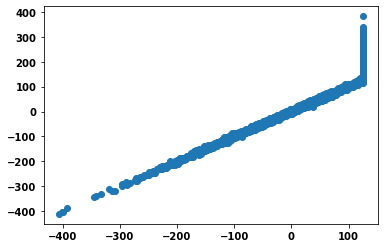

In [59]:
pred = model.predict(X_test)
plt.scatter(pred,y_test)
# plt.legend()
# df = pd.DataFrame({"Predictions":pred , "y_test":y_test})

## Plotting Loss

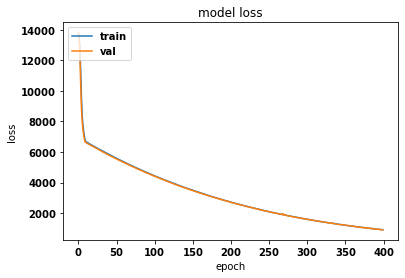

In [60]:
losses.plot()
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")

## Evaluation

In [61]:
X_test.shape

(2000, 5)

In [62]:
r2_score(y_true= y_test, y_pred= pred)

0.9360699543761317